In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
import category_encoders as ce
from sklearn.metrics import mean_squared_error

# Data retrieving

In [2]:
df = pd.read_csv('Data/Cleaned_Data/book_user_explicit_rating_cleaned.csv',encoding='UTF-8')


# Drop unnecessary columns

In [3]:
df = df.drop(columns=['index'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(columns=['Image_URL','ISBN'])

# Create copies of df for later use

In [4]:
new_df = df.copy()
new_df_2 = df.copy()

# Feature Engineering

## Encode categorical features

In [5]:
cat_cols = ['Book_Title','Book_Author','Publisher','Country']

In [6]:
labelenc = LabelEncoder()
binenc = ce.BinaryEncoder(cols=cat_cols)

We will first label encode all categorical features, then we will apply binary encoder on `'Book_Title','Book_Author','Publisher','Country'` features, and keep the label encode for `User_ID` and `Unique_ISBN`

The reason why we use binary encoder is because our categorical features have high cardinality. Therefore, One-hot encode would not be efficient. On the other hand, the binary encoder from `category_encoders` libary is a combination of hashing and one-hot encoding. Therefore, it is more efficient 

In [7]:
def label_encoding(df,param):
    df[param] = labelenc.fit_transform(df[param].values)
    df[param] = df[param].astype('category')

In [8]:
label_encoding(new_df, 'User_ID')
label_encoding(new_df, 'Unique_ISBN')
label_encoding(new_df, 'Book_Title')
label_encoding(new_df, 'Book_Author')
label_encoding(new_df, 'Publisher')
label_encoding(new_df, 'Country')
label_encoding(new_df, 'Age_Range')

In [9]:
new_df = binenc.fit_transform(new_df)

## Scale data

Since our data is cleaned with minimal outliers, we could perform StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
new_df_scaled = scaler.fit_transform(new_df)

In [12]:
new_df_scaled_2 = new_df_scaled.copy()

# Dimensionality reduction

There are many dimensionality reduction techniques. In this project, we explore the most popular techniques which are PCA and TruncatedSVD

## PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df_scaled_2)

## TruncatedSVD

In [14]:
svd = TruncatedSVD(n_components=2, random_state=226).fit_transform(new_df_scaled)

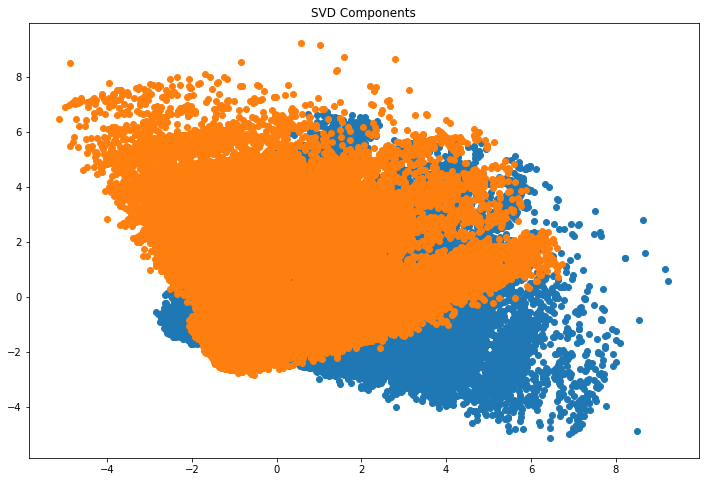

In [15]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,0])

Text(0, 0.5, 'SVD2')

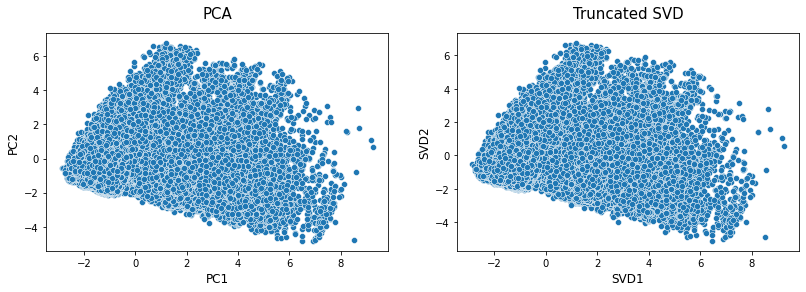

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X_pca[:,0],y= X_pca[:,1], ax=ax[0])
sns.scatterplot(x=svd[:,0], y=svd[:,1], ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD", fontsize=15, pad=15)
ax[0].set_xlabel('PC1', fontsize=12)
ax[0].set_ylabel('PC2', fontsize=12)
ax[1].set_xlabel('SVD1', fontsize=12)
ax[1].set_ylabel('SVD2', fontsize=12)

# Conclusion

The two methodologies produce very similar results. Therefore, it is safe to use PCA for dimensionality reduction since we do not have to centralize the data once more time before fitting into our algorithms.